In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
DATADIR="/cellar/users/snwright/Data/RareCommon/"

In [4]:
data = pd.read_csv(DATADIR + '/Reference/ukbb_corr_neale-2023-05-10.csv')

In [8]:
phenotypes = set(data.ID1.unique()).union(set(data.ID2.unique()))

In [27]:
test = ['C92', '2453', '30680', 'C92', 'C3', 'D46', 'D47', 'XVII', '30630', '30640', '30840', '30880', '23110', '30050',
       '30140', '30250', 'E80']
for term in test:
    for pheno in phenotypes:
        if term in pheno:
            print(pheno)

C3_OTHER_SKIN
C3_BREAST_3
C3_PROSTATE
C3_MALE_GENITAL
C3_SKIN
C3_DIGESTIVE_ORGANS
XVIII_MISCFINDINGS
23110
30050
30140
30250


In [28]:
present = ['20015','20151', '23098', '3063', '5133', '23110', '30050', '30140', '30250']

In [31]:
names = {'20015':'Sitting Height','20151':'Forced Vital Capacity', '23098':'Weight', '3063':'Forced expiratory volume',
         '5133':'6mm strong meridian', '23110':'Impedance of arm', '30050':"Mean corpuscular haemoglobin",
         '30140':"Neutrophil count", '30250':'Reticulocyte count'}

In [29]:
compare = data[((data.ID2.isin(present)) & (data.ID1.isin(present)))]

In [55]:
compare["Pheno1"] = compare['ID1'].apply(lambda x: names[x])
compare["Pheno2"] = compare['ID2'].apply(lambda x: names[x])

/tmp/ipykernel_1008758/3252378282.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compare["Pheno1"] = compare['ID1'].apply(lambda x: names[x])
/tmp/ipykernel_1008758/3252378282.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compare["Pheno2"] = compare['ID2'].apply(lambda x: names[x])


In [56]:
compare_table = compare.pivot('Pheno1', 'Pheno2', 'rg')

In [57]:
compare_table = compare_table.fillna(1)

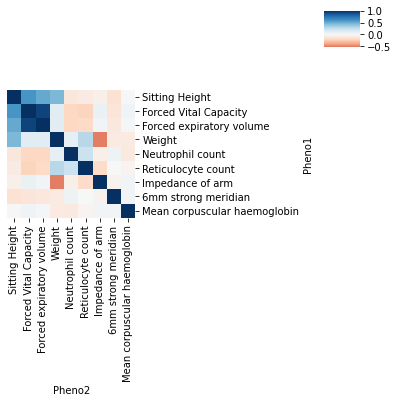

In [76]:
plt.rcParams['svg.fonttype'] = 'none'
cg = sns.clustermap(compare_table, cmap = 'RdBu', center=0, figsize=(5,5), cbar_pos=(1,1, 0.1, 0.1))
cg.ax_row_dendrogram.set_visible(False)
cg.ax_col_dendrogram.set_visible(False)
plt.savefig("/cellar/users/snwright/Data/Transfer/RVC/genetic_correlations.svg", dpi=400, bbox_inches='tight')

In [30]:
compare.plot(kind='scatter', )

,ID1,ID2,Phenotype 1,Phenotype 2,h2,h2 SE,h2 intercept,h2 intercept SE,rpheno,rg,rg SE,Z,p,rg intercept,rg intercept SE
92737,20015,20151,<a href='https://ukbb-rg.hail.is/rg_summary_20...,<a href='https://ukbb-rg.hail.is/rg_summary_20...,0.2345,0.010300,1.096,0.02031,0.373581,0.592200,0.01643,36.0400,1.750000e-284,0.409600,0.024510
92834,20015,23098,<a href='https://ukbb-rg.hail.is/rg_summary_20...,<a href='https://ukbb-rg.hail.is/rg_summary_23...,0.2635,0.009121,1.080,0.02183,0.346019,0.445300,0.01630,27.3300,2.005000e-164,0.406900,0.021620
92845,20015,23110,<a href='https://ukbb-rg.hail.is/rg_summary_20...,<a href='https://ukbb-rg.hail.is/rg_summary_23...,0.2308,0.008072,1.106,0.02215,-0.092338,-0.056000,0.01903,-2.9420,3.257000e-03,-0.103200,0.012460
92912,20015,30050,<a href='https://ukbb-rg.hail.is/rg_summary_20...,<a href='https://ukbb-rg.hail.is/rg_summary_30...,0.2348,0.029600,1.154,0.06406,-0.012837,-0.007373,0.01754,-0.4204,6.742000e-01,-0.018920,0.011660
92921,20015,30140,<a href='https://ukbb-rg.hail.is/rg_summary_20...,<a href='https://ukbb-rg.hail.is/rg_summary_30...,0.1589,0.016870,1.123,0.03657,-0.067485,-0.113400,0.01897,-5.9750,2.296000e-09,-0.082150,0.011760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319897,5133,23110,<a href='https://ukbb-rg.hail.is/rg_summary_51...,<a href='https://ukbb-rg.hail.is/rg_summary_23...,0.2308,0.008072,1.106,0.02215,-0.007147,-0.029760,0.02426,-1.2270,2.200000e-01,-0.000165,0.008837
319964,5133,30050,<a href='https://ukbb-rg.hail.is/rg_summary_51...,<a href='https://ukbb-rg.hail.is/rg_summary_30...,0.2348,0.029600,1.154,0.06406,0.004352,0.032930,0.02116,1.5570,1.196000e-01,-0.004254,0.008866
319973,5133,30140,<a href='https://ukbb-rg.hail.is/rg_summary_51...,<a href='https://ukbb-rg.hail.is/rg_summary_30...,0.1589,0.016870,1.123,0.03657,0.052772,0.052140,0.02710,1.9240,5.442000e-02,0.027950,0.008526
319982,5133,30250,<a href='https://ukbb-rg.hail.is/rg_summary_51...,<a href='https://ukbb-rg.hail.is/rg_summary_30...,0.1821,0.015210,1.164,0.06157,0.031202,0.005175,0.02314,0.2236,8.231000e-01,0.038240,0.008009
